<a href="https://colab.research.google.com/github/dru15/Handwritten-Digit-Recognition/blob/main/Handwritten_number_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageOps
import cv2

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
cnn_model = models.Sequential([


    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.6)
])

input_layer = layers.Input(shape=(28, 28, 1))
cnn_output = cnn_model(input_layer)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(cnn_output)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(10, activation='softmax')(x)

mixed_model = models.Model(inputs=input_layer, outputs=output_layer)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip='False',
    fill_mode='nearest',

)

train_data_augmented = datagen.flow(X_train, y_train, batch_size=32)


In [ ]:
mixed_model.compile(optimizer='adam', loss ='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
test_loss, test_accuracy = mixed_model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1017 - loss: 8.7025
Test Accuracy: 9.54%


In [ ]:
mixed_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.2490 - loss: 4.2339 - val_accuracy: 0.7924 - val_loss: 0.8666
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7663 - loss: 0.9876 - val_accuracy: 0.8778 - val_loss: 0.5611
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8462 - loss: 0.7378 - val_accuracy: 0.9630 - val_loss: 0.3790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8993 - loss: 0.6299 - val_accuracy: 0.9614 - val_loss: 0.3959
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9119 - loss: 0.5732 - val_accuracy: 0.9674 - val_loss: 0.3591
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9182 - loss: 0.5371 - val_accuracy: 0.9695 - val_loss: 0.3459
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9273 - loss: 0.5058 - val_accuracy: 0.9705 - val_loss: 0.3318
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9321 - loss: 0.49

In [ ]:
test_loss, test_accuracy = mixed_model.evaluate(X_test,y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.3369
Test Accuracy: 97.22%


In [1]:
from google.colab import files
import io
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 19.jpg to 19.jpg
User uploaded file "19.jpg" with length 242927 bytes


In [ ]:
def preprocess_image(image_path, display=False, zoom_factor=2.0):
    #grayscale
    image = Image.open(image_path).convert("L")
    image_array = np.array(image)

    # Compute zoomed dimensions
    height, width = image_array.shape
    new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)

    # Calculate cropping coordinates for a central zoom
    start_x = (width - new_width) // 2
    start_y = (height - new_height) // 2
    end_x = start_x + new_width
    end_y = start_y + new_height

    # Crop to create a zoomed-in effect
    zoomed_image = image_array[start_y:end_y, start_x:end_x]

    # Resize the zoomed image to 28x28
    resized_image = cv2.resize(zoomed_image, (28, 28), interpolation=cv2.INTER_LINEAR)

    # Threshold to ensure binary format (background is black and digit is white)
    _, binary_image = cv2.threshold(resized_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Normalize to 0-1 range
    processed_image = binary_image / 255.0

    # Invert colors if needed (ensure digits are white on black)
    processed_image = 1.0 - processed_image

    # Reshape to fit model input (1, 28, 28, 1)
    processed_image = np.expand_dims(processed_image, axis=0)
    processed_image = np.expand_dims(processed_image, axis=-1)


    plt.imshow(processed_image[0, :, :, 0], cmap="gray")
    plt.axis("off")
    plt.show()

    return processed_image


In [ ]:
def display_prediction(image_path, model):
    # Preprocess the image for the model
    processed_image = preprocess_image(image_path)

    # Make a prediction
    prediction = mixed_model.predict(processed_image)
    predicted_class = np.argmax(prediction)

    # Load the original image for display
    original_image = Image.open(image_path)

    # Display the image and the prediction
    plt.imshow(original_image, cmap='gray')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')  # Turn off the axis
    plt.show()


In [ ]:
def preprocess_image_from_array(image_array):
    # Convert the array to a PIL Image
    image = Image.fromarray(image_array.astype(np.uint8))

    # Resize to the desired dimensions for your model (e.g., 28x28)
    image = image.resize((28, 28))

    # Convert back to a NumPy array
    image_array = np.array(image)

    # Reshape to match the model's input shape (e.g., (1, 28, 28, 1) for a single grayscale image)
    image_array = image_array.reshape(1, 28, 28, 1)

    # Normalize pixel values to the range [0, 1]
    image_array = image_array / 255.0

    return image_array

In [ ]:

def split_digits(image_path):
    # Sum the values along each column to get the horizontal projection
    column_sums = np.sum(image_path, axis=0)

    # Identify columns with low pixel values as potential gaps
    gap_threshold = np.max(column_sums) * 0.1  # Adjust the threshold as needed
    gap_indices = np.where(column_sums < gap_threshold)[0]

    # If there's a gap, split at the midpoint of the gap
    if len(gap_indices) > 0:
        split_point = (gap_indices[0] + gap_indices[-1]) // 2
        digit_1 = image_path[:, :split_point]
        digit_2 = image_path[:, split_point:]
        return digit_1, digit_2

    # Return None if no clear gap is found
    return None, None

def preprocess_and_predict(image_path, model):

    binary_image = preprocess_image(image_path, display=True)[0, :, :, 0] * 255

    digit_1_array, digit_2_array = split_digits(binary_image)



    if digit_1_array is not None and digit_2_array is not None:
        digit_1_processed = preprocess_image_from_array(digit_1_array)
        digit_2_processed = preprocess_image_from_array(digit_2_array)

        prediction_1 =str(np.argmax(mixed_model.predict(digit_1_processed), axis=-1))
        prediction_2 = str(np.argmax(mixed_model.predict(digit_2_processed), axis=-1))
        original_image = Image.open(image_path)
        plt.imshow(original_image, cmap='gray')


        plt.title(f"Predicted Num: {int(prediction_1[1]+prediction_2[1])}")
        plt.axis('off')
        plt.show()
    else:
        print("Could not identify two distinct digits.")
        return None, None

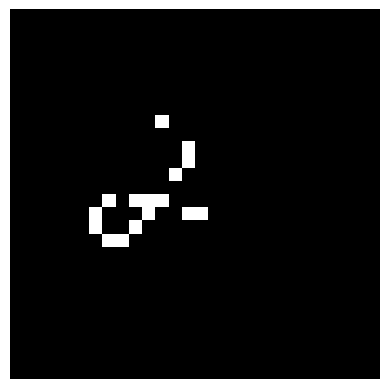

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


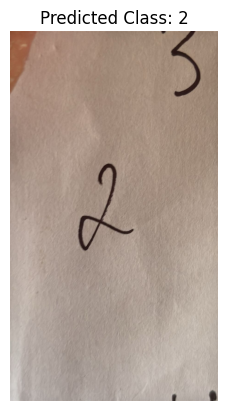

In [ ]:
display_prediction(io.BytesIO(uploaded[fn]), mixed_model)

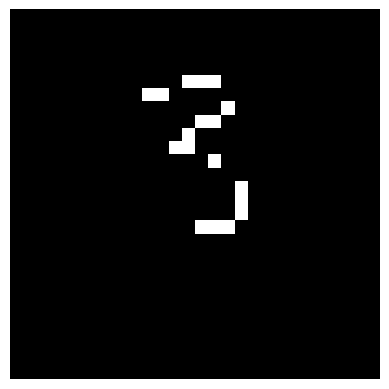

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


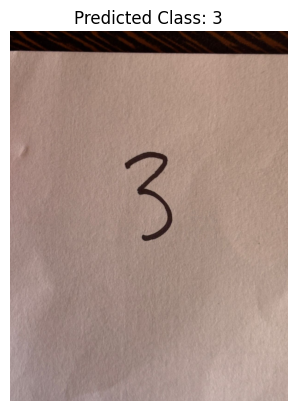

In [ ]:
display_prediction(io.BytesIO(uploaded[fn]), mixed_model)

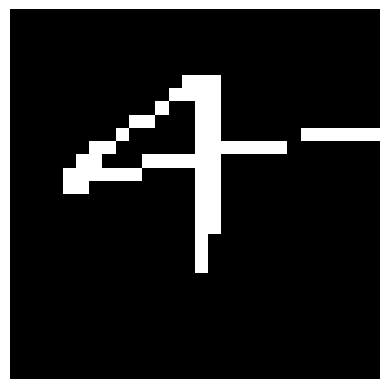

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


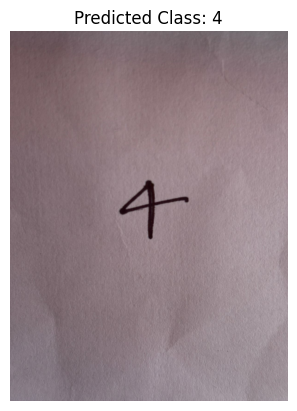

In [ ]:
display_prediction(io.BytesIO(uploaded[fn]), mixed_model)

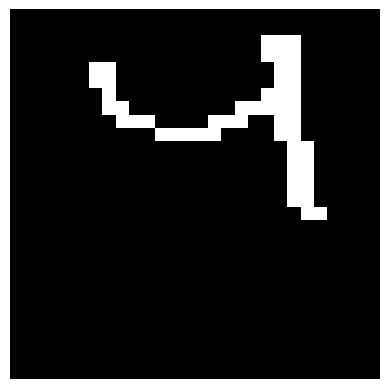

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


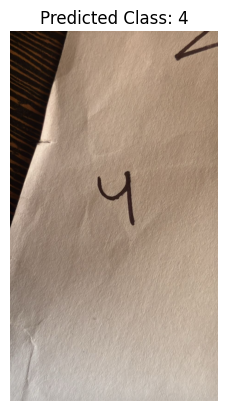

In [ ]:
display_prediction(io.BytesIO(uploaded[fn]), mixed_model)

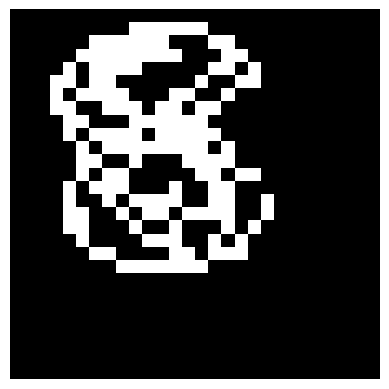

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


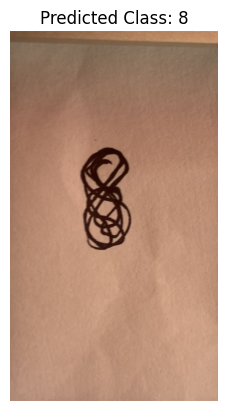

In [ ]:
display_prediction(io.BytesIO(uploaded[fn]), mixed_model)

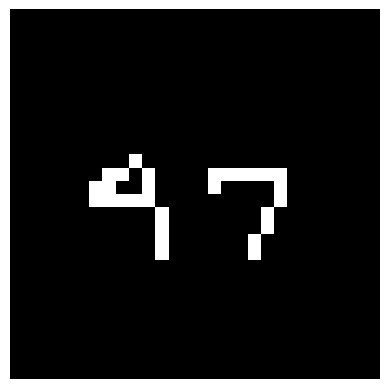

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


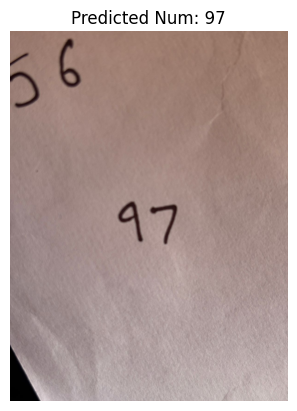

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

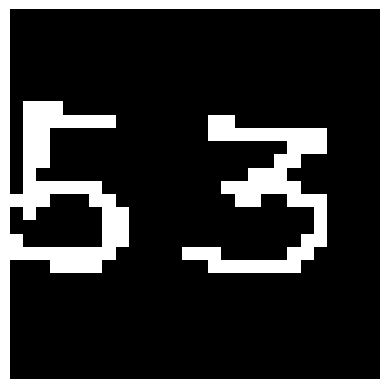

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


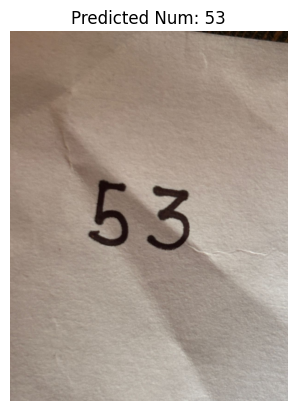

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

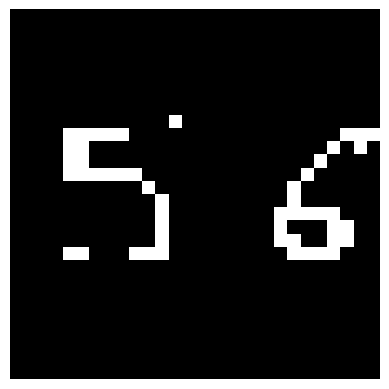

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


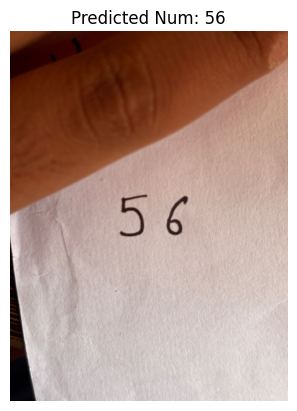

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

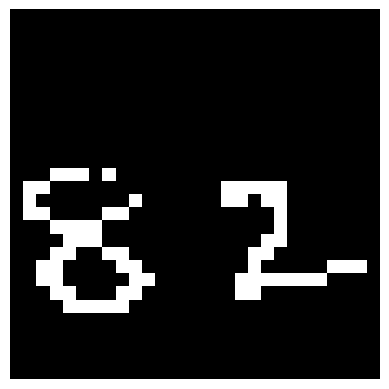

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


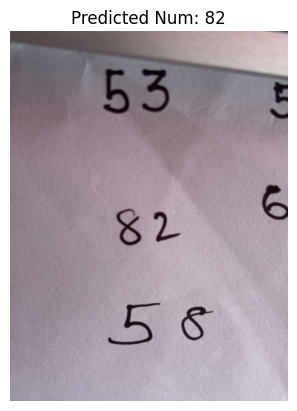

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

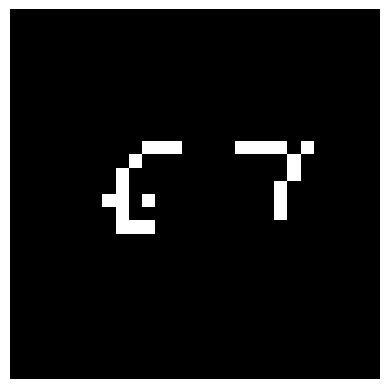

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


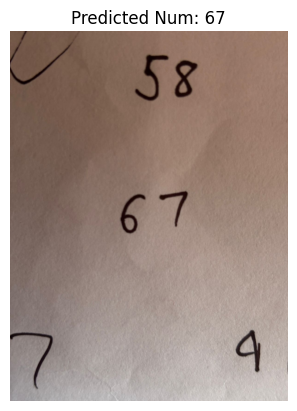

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)

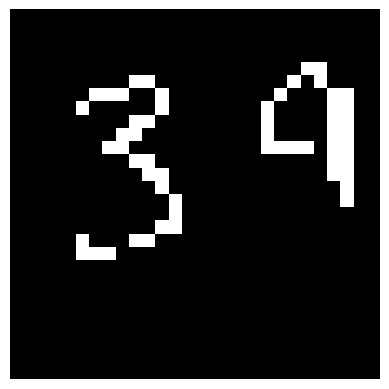

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


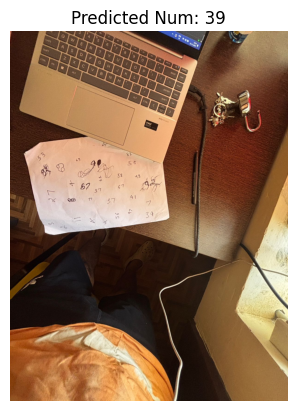

In [ ]:
preprocess_and_predict(io.BytesIO(uploaded[fn]), mixed_model)